# Plots for NSIDC CPP Open Science Talk

Talk on January 25 2023

In [1]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse, Rectangle
from matplotlib.collections import PatchCollection

import numpy as np

In [2]:
mpl.__version__

'3.3.1'

## Degrees of Openness or Openness by Degrees

Make some categories

In [ ]:
#     nasa_req = make_patch('Agency Oversight', ['Publication'], linewidth=2, facecolor='xkcd:lightblue')
    
#     status_quo = make_patch('research group', ['conceptualization', 'design', 'collection and analysis', 'documenting'],
#                             hatch='x', fill=False, linewidth=2, facecolor=None)
#     science_team = make_patch('science team', ['collection and analysis'], 
#                               hatch='x', fill=False, linewidth=2, facecolor=None, edgecolor='xkcd:dark teal')
#     collaboration = make_patch('collaborative team', ['design', 'collection and analysis', 'documenting'], 
#                                hatch='.', fill=False, linewidth=2, edgecolor='xkcd:light purple')
#     buddies = make_patch('peers', ['collection and analysis', 'documenting'], 
#                                    hatch='+', fill=False, linewidth=2, edgecolor='xkcd:brick red')
# #    our_goal1 = make_patch( 


In [165]:
# Dictionaries define the two axes of Openness define by Whyte and Prior 2011

# This might be updated to maybe research group, collaborative team, peers, 
level_of_engagement = {
    "research group": 1.,          # within a research group convened for a project
    "collaborative team": 2.,      # with a group of collaborators within an institutions or some external group; e.g. MOSAiC 
    "peer exchange": 3.,           # with a network of peers
    "community sharing": 4.,       # with a specified community or communities - maybe a science team
    "transparent governance": 5.,  # with an external agency
    "public": 6.                   # with the public at large
}

research_stage = {
    "conceptualization": 1., 
    "design": 2., 
    "collection and analysis": 3., 
    "documenting": 4.,
    "publication": 5., 
    "outreach": 6., 
    "infrastructure": 7.
}

def make_patch(stage, inclusivity, shape, **kwargs):
    """Creates an elliptical patch for a degree of openness"""
    #print(f"make_patch: {kwargs}")
    x = level_of_engagement.get(inclusivity.lower())
    y = research_stage.get(stage.lower())
    width = 1.
    height = 1.1
    if shape == 'ellipse':
        patch = Ellipse((x, y), width=width, height=height, **kwargs)
    elif shape == 'rectangle':
        patch = Rectangle((x-0.5, y-0.5), width=width, height=height, facecolor='xkcd:light pink')
    else:
        raise NotImplementedError(f"{shape} not recognized")
    return patch

def openness_plot(openness_dict=None, title="", shape="ellipse", **kwargs):
    """Makes a xkcd-style plot of Openness of a research project"""
    print(f"openness_plot: {kwargs}")
    
    def to_title(s):
        skip_title = ['and', 'is', 'in', 'of']
        return ' '.join([sx.title() if sx not in skip_title else sx for sx in s.split(' ')])
                        
    xticks = list(level_of_engagement.values())
    xlabels = [to_title(s) for s in list(level_of_engagement.keys())]
    yticks = list(research_stage.values())
    ylabels = [to_title(s) for s in list(research_stage.keys())]
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(7,7))
        
        ax.plot()
        ax.set_title(title)
        
        ax.set_xlabel("Inclusiveness", fontsize=20)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xlabels)
        ax.set_xlim(0.5, ax.get_xticks()[-1]+0.5)
        xlabels = ax.get_xticklabels()
        plt.setp(xlabels, rotation=45, horizontalalignment='right', fontsize=15)

        ax.set_ylabel("Research Cycle Stage", fontsize=20)
        ax.set_yticks(yticks)
        ax.set_ylim(0.5, ax.get_yticks()[-1]+0.5)
        ax.set_yticklabels(ylabels, fontsize=15);

        # Add some patches
        if not openness_dict is None:
            patches = []
            for engagement, stage in openness_dict.items():
                #for stg in stage:
                patches.append(make_patch(engagement, stage, shape, **kwargs))
            p = PatchCollection(patches)
            p.set(color='xkcd:light blue')  # Might need to add hatch to set
            ax.add_collection(p)
        
    return fig, ax

### Setup plot

openness_plot: {'facecolor': 'xkcd:light blue'}


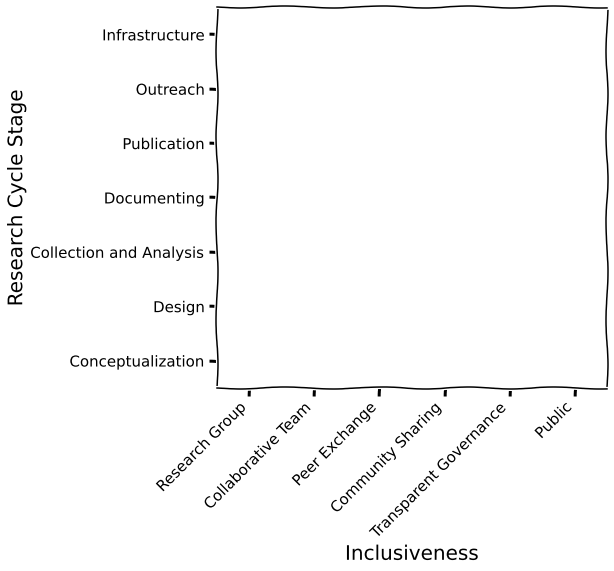

In [157]:
fig, ax = openness_plot(title="", shape="rectangle", facecolor='xkcd:light blue')
fig.savefig("bare_axes_openness.png", bbox_inches="tight")

### The Status Quo

openness_plot: {'facecolor': 'xkcd:light pink'}


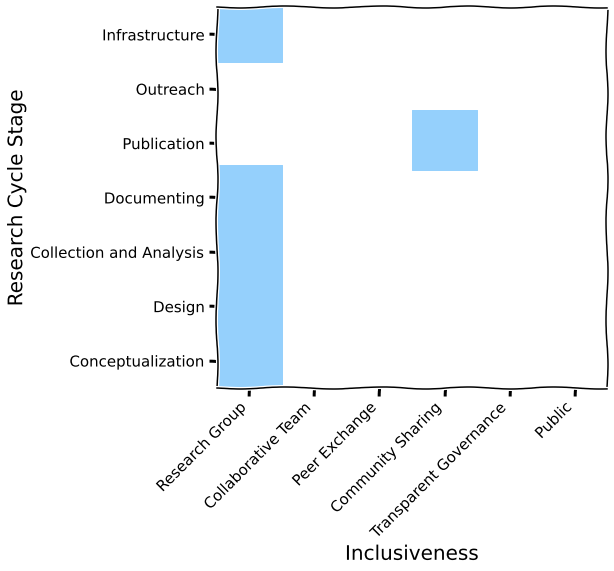

In [158]:
status_quo = {
    'conceptualization': 'research group',
    'design': 'research group',
    'collection and analysis': 'research group',
    'documenting': 'research group',
    'publication': 'community sharing', 
    'infrastructure': 'research group'
}
fig, ax = openness_plot(status_quo, title="", shape="rectangle", facecolor='xkcd:light pink')
fig.savefig("status_quo_openness.png", bbox_inches="tight")

### NASA Requirements

openness_plot: {'facecolor': 'xkcd:light blue'}


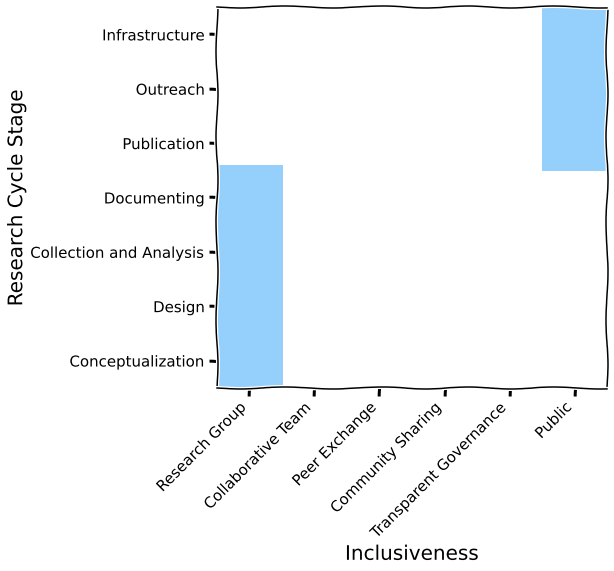

In [159]:
nasa_required = {
    'conceptualization': 'research group',
    'design': 'research group',
    'collection and analysis': 'research group',
    'documenting': 'research group',
    'publication': 'public',
    'outreach': 'public',
    'infrastructure': 'public'
}
fig, ax = openness_plot(nasa_required, title="", shape="rectangle", facecolor='xkcd:light blue')
fig.savefig("nasa_required_openness.png", bbox_inches="tight")

openness_plot: {'facecolor': 'xkcd:light blue'}


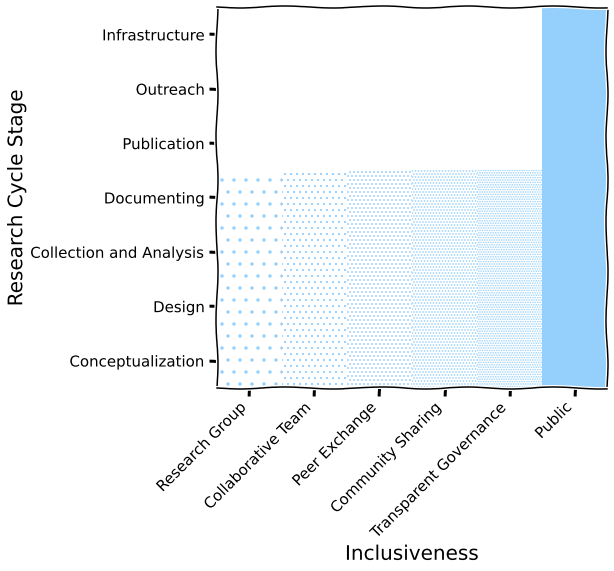

In [166]:
degrees_of_openness = {
    'publication': 'public',
    'outreach': 'public',
    'infrastructure': 'public'
}
fig, ax = openness_plot(degrees_of_openness, title="", shape="rectangle", facecolor='xkcd:light blue')

hatch = ''
for x in [1, 2, 3, 4, 5]:
    hatch = hatch + '.'
    patch = Rectangle((x-0.5, 0.5), width=1, height=4, hatch=hatch, edgecolor='xkcd:light blue', fill=None, lw=0.0)
    ax.add_patch(patch)

patch = Rectangle((5.5, 0.5), width=1, height=4, facecolor='xkcd:light blue')
ax.add_patch(patch)

fig.savefig("degrees_of_openness.png", bbox_inches="tight")
